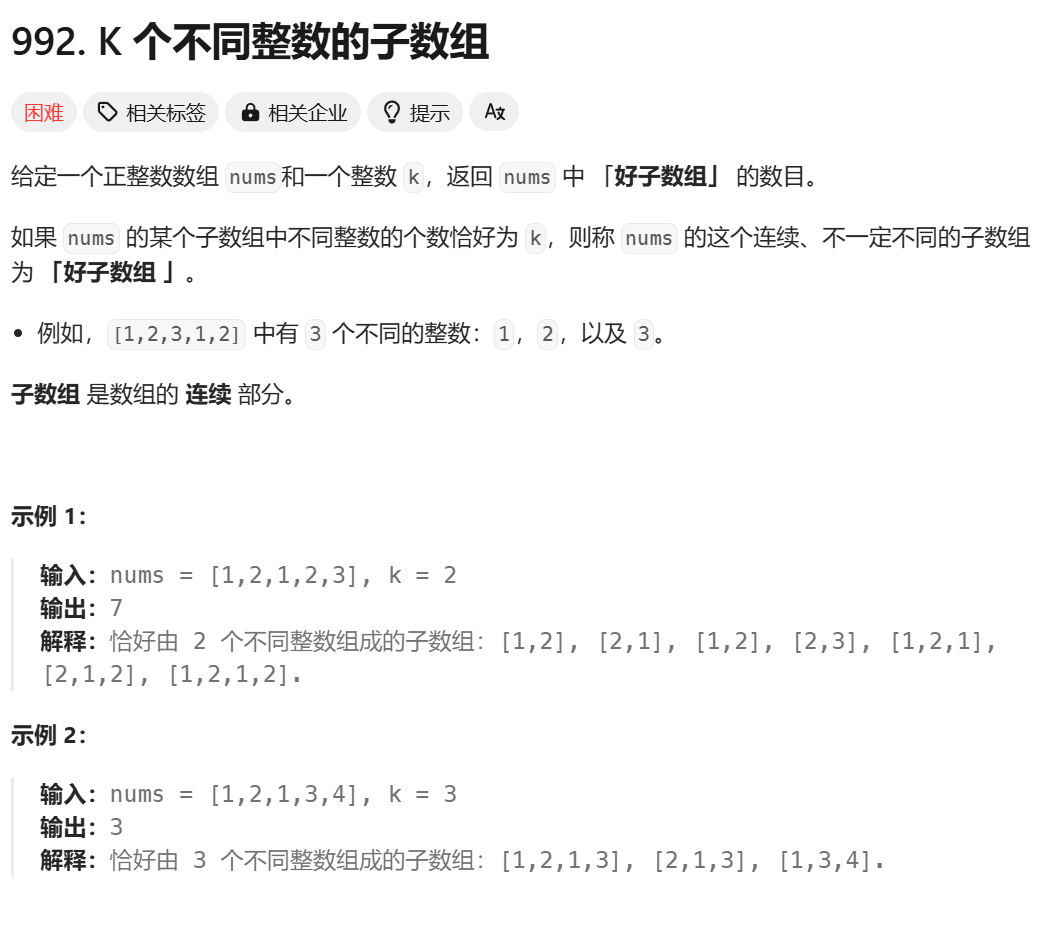

# 自己写的恰好，超时了因为有反向搜索的过程。。。
# 但是也是可以通过大多数的！

In [ ]:
from typing import List
from collections import defaultdict
class Solution:
    def subarraysWithKDistinct(self, nums: List[int], k: int) -> int:
        # 滑动窗口，使得窗口中只有k种元素
        # 每滑动一个，如果为0（列表），说明原来就没有，同时,cnt ++（cnt计算已经有几个元素了）
        # 如果cnt 大于 k 将左边界向右移动直到cnt == k
        # 如果列表的val为1，说明left移动后，该元素消失，可以使得cnt --

        # 如果不为0，说明出现相同元素，同时如果cnt 恰好等于k那么可以产生从left,到right 的子数组 数目为right - lef
        # 不对，还得逆向搜索直到cnt == k
        # 因为原问题就转换成为求解「最多存在 K 个不同整数的子区间的个数」与 「最多存在 K−1 个不同整数的子区间的个数」，它们其实是一个问题
        haxi = defaultdict(int)  # 必须要制定 int 的默认是0
        left, cnt, res = 0, 0, 0
        for right, val in enumerate(nums):
            if haxi[val] == 0:
                cnt += 1
            haxi[val] += 1

            while cnt > k:
                if haxi[nums[left]] == 1:
                    cnt -= 1
                haxi[nums[left]] -= 1
                left += 1
            
            if cnt == k:
                # 备份当前状态  下面做的就是判断这个有k个元素的窗口中能保持k的子窗口那么左边需要向右移动
                i = left 
                back_haxi = defaultdict(int)
                back_cnt = cnt
                while back_cnt == k:
                    if back_haxi[nums[i]] == (haxi[nums[i]] - 1):
                        back_cnt -= 1
                    back_haxi[nums[i]] += 1
                    i += 1
                    res += 1

                
        return res

 # 因为原问题就转换成为求解「最多存在 K 个不同整数的子区间的个数」与 「最多存在 K−1 个不同整数的子区间的个数」，它们其实是一个问题

In [ ]:
class Solution:
    def subarraysWithKDistinct(self, nums: List[int], k: int) -> int:
        def helper(k):
            ans = 0
            l = 0
            g = defaultdict(int)
            for r, x in enumerate(nums):
                g[x] += 1
                while len(g) > k:
                    g[nums[l]] -= 1
                    if g[nums[l]] == 0:
                        del g[nums[l]]   # 这个删除用的好 可以直接与len(g)联动，避免错误
                    l += 1
                # 从上面循环出来一定保证g.keys() == k
                ans += r - l  # 每前进一个就会多产生 r- l 的子数组
            return ans
        return helper(k) - helper(k-1)
        